<a href="https://colab.research.google.com/github/dmitriy-kuleshov/fake-news-detector/blob/main/Fake_news_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Обнаружение фальшивых новостей**

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

df_preprocess = pd.read_csv(f'fake_news.csv')
df = pd.DataFrame(df_preprocess, columns=['title', 'text', 'label'])
df = df.dropna(subset=['text', 'label'])
df['text'] = df['text'].astype(str).str.lower()
df

,title,text,label
0,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,the state department told the republican natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,anti-trump protesters are tools of the oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","addis ababa, ethiopia —president obama convene...",REAL


In [56]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(5068,) (1267,)


In [60]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Точность определения: {accuracy_score(y_test, y_pred)*100:.3f}%\n")
print(classification_report(y_test, y_pred))


Точность определения: 93.765%

              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94       628
        REAL       0.94      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



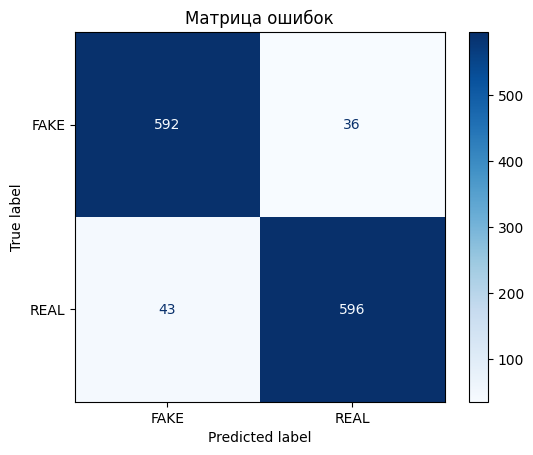

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap='Blues')
plt.title('Матрица ошибок')
plt.show()

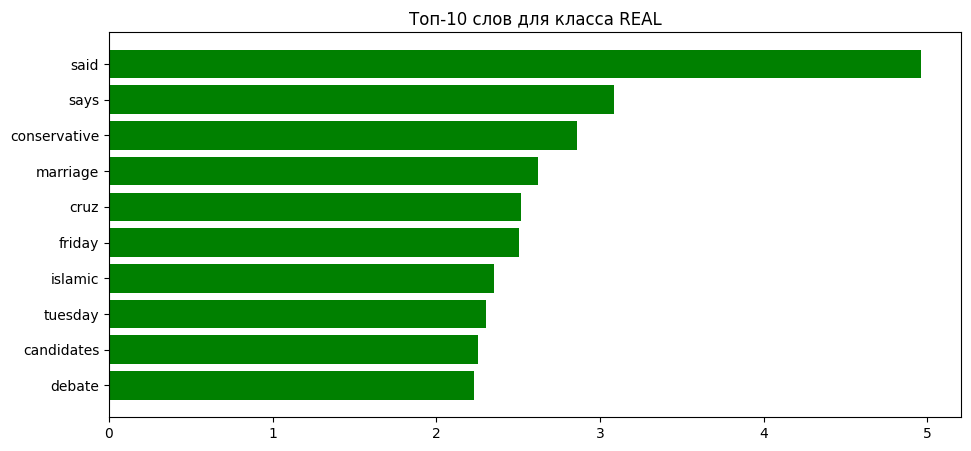

In [76]:
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

top_positive = np.argsort(coefs)[-10:]
top_negative = np.argsort(coefs)[:10]

plt.figure(figsize=(11,5))
plt.barh(range(10), coefs[top_positive], color='green')
plt.yticks(range(10), [feature_names[i] for i in top_positive])
plt.title('Топ-10 слов для класса REAL')
plt.show()

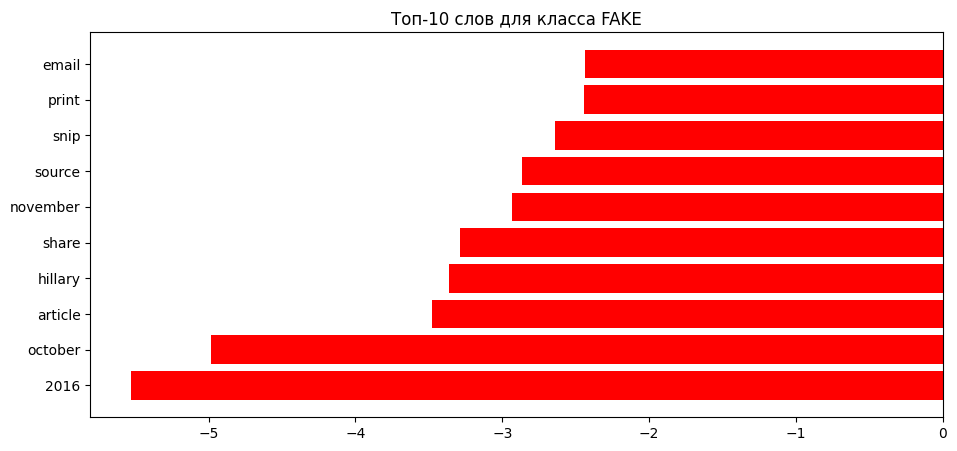

In [77]:

plt.figure(figsize=(11,5))
plt.barh(range(10), coefs[top_negative], color='red')
plt.yticks(range(10), [feature_names[i] for i in top_negative])
plt.title('Топ-10 слов для класса FAKE')
plt.show()
